In [1]:
!pip install tensorflow

In [2]:
import tensorflow
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
dataset=keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste))=dataset.load_data()

In [3]:
len (imagens_treino)
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

In [5]:
identificacoes_teste.shape

(10000,)

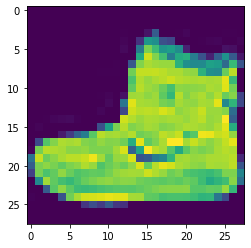

In [6]:
plt.imshow(imagens_treino[0])

In [7]:
# Quantas categorias temos no modelo?
identificacoes_treino.max()


9

In [8]:
identificacoes_treino.min()


0

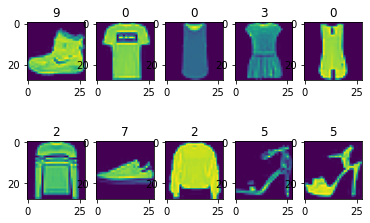

In [9]:
# 0 a 9 = 10 categorias identificadas pelo modelo
total_classificacoes = 10
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])
    


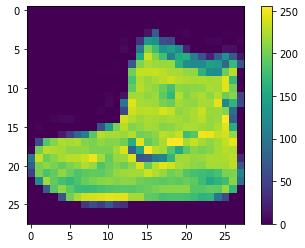

In [10]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Construindo o Modelo

In [11]:
#dividindo as imagens treino pelos valores de cores do modelo (nesse caso é 255, conforme imagem acima) => NORMALIZAÇÃO
imagens_treino = imagens_treino/float(255)
modelo = keras.Sequential([
    # Camanada 0 (Entrada) = FLATTEN do modelo conforme pixels
        keras.layers.Flatten(input_shape=(28, 28)),
    # Camada 1 (Processamento) = DENSE + RELU, totalmente conectada
        keras.layers.Dense(256, activation = tensorflow.nn.relu),
        # técncica para adormecer os neurônios, uma especie de NORMALIZAÇÃO:
        keras.layers.Dropout(0.2),
    # Camada 2 (Saída) = DENSE + SOFTMAX, através de uma cadeia de probabilidade de acerto da imagem
        keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# No Keras tem que compilar o modelo antes do treinamento
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5199 - accuracy: 0.8156 - val_loss: 0.4124 - val_accuracy: 0.8447
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3943 - accuracy: 0.8574 - val_loss: 0.3704 - val_accuracy: 0.8661
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3619 - accuracy: 0.8670 - val_loss: 0.3422 - val_accuracy: 0.8758
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8761 - val_loss: 0.3385 - val_accuracy: 0.8757
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3236 - accuracy: 0.8793 - val_loss: 0.3239 - val_accuracy: 0.8817
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8854 - val_loss: 0.3369 - val_accuracy: 0.8760
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8895 - val_loss: 0.3221 - val_accuracy:

In [12]:
historico.history

{'loss': [0.5198929309844971,
  0.394275963306427,
  0.36187076568603516,
  0.33923792839050293,
  0.3235640525817871,
  0.3114579916000366,
  0.29804152250289917,
  0.28653353452682495,
  0.27769237756729126,
  0.2722756564617157],
 'accuracy': [0.8155624866485596,
  0.8573750257492065,
  0.8669583201408386,
  0.8760625123977661,
  0.8792916536331177,
  0.8854374885559082,
  0.8895000219345093,
  0.8928333520889282,
  0.8957708477973938,
  0.898604154586792],
 'val_loss': [0.4124482274055481,
  0.37043750286102295,
  0.34224438667297363,
  0.33848321437835693,
  0.3239297568798065,
  0.3368794918060303,
  0.32206645607948303,
  0.3282276690006256,
  0.3171280026435852,
  0.31425997614860535],
 'val_accuracy': [0.8446666598320007,
  0.8660833239555359,
  0.8757500052452087,
  0.8756666779518127,
  0.8817499876022339,
  0.8759999871253967,
  0.8829166889190674,
  0.8838333487510681,
  0.8868333101272583,
  0.887583315372467]}

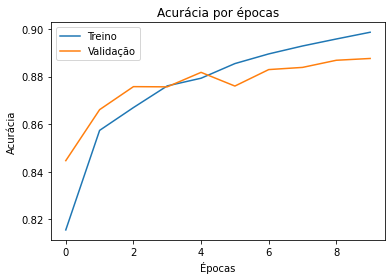

In [13]:
#Gráfico ACCURACY
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

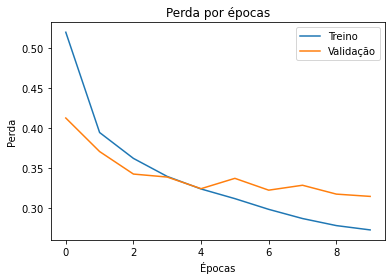

In [14]:
#Gráfico ACCURACY
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [15]:
# Fazendo testes individuais de ACCURACY
testes = modelo.predict(imagens_teste)
print('Resultado teste:',np.argmax(testes[0]))
print('Numero de imagens no teste:',identificacoes_teste[0])

Resultado teste: 9
Numero de imagens no teste: 9


In [19]:
#Após adequar o modelo, deve-se salvar o arquivo para novos predicts
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [22]:
# Fazendo testes individuais de ACCURACY
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste:',np.argmax(testes_modelo_salvo[10]))
print('Numero de imagens no teste:',identificacoes_teste[10])



Resultado teste: 4
Numero de imagens no teste: 4


In [16]:
# AValiando o rendimento do modelo Deep Learning -> EVALUATE
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 62.2886 - accuracy: 0.8584A: 0s - loss: 59.7566 - accuracy: 0
Perda do teste 62.28864288330078
Acurácia do teste 0.8583999872207642
